## Pandas

In [1]:
!pip show pandas # !: OS 명령어 실행

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\programdata\anaconda3\envs\ai\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: seaborn


In [2]:
!pip install pandas==1.5.3

In [3]:
import pandas as pd  # pandas python package를 pd라고 별명을 부여

In [10]:
# pd 모듈의 read_csv 함수 호출, csv -> DataFrame
df = pd.read_csv('./data/mpg.csv') 
print(type(df))
display(df.head(3))
display(df.tail(3))

<class 'pandas.core.frame.DataFrame'>


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [11]:
# 연비의 합계 산출 total = cty + hwy
df['total'] = df['cty'] + df['hwy']
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42


In [12]:
#  평균 연비 = total / 2
df['total'] = df['total'] / 2
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [18]:
# total 연비의 총합
print(df['total'].sum())
print(df['total'].mean())
print(round(df['total'].mean(), 4))

4715.0
20.14957264957265
20.1496


In [19]:
# 도메인 지식: 분석가가 컬럼의 의미를 해석 할 수 있는 지식
# cty: gallon 당 도시 주행 마일 수, 1 갤런은 3.78541 리터, 1마일은 1.609 KM
# hwy: gallon 당 고속도로 주행 마일 수 
# 1갤런당 몇킬로를 갈 수 있는지 변수 추가, gallonkm
# total 변수는 갤런당 마일수 -> 갤런당 KM
df['gallonkm'] = df['total'] * 1.609
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,gallonkm
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,37.8115
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,40.2250
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,41.0295


In [25]:
# 1 갤런당 KM -> 1리터당 KM로 출력하는 기능 추가 literkm
# 1 갤런은 3.78541 리터
# 1 갤런이 1리터 가정: 1(10) : 1(10)
# 1 갤런이 2리터 가정: 1(10) : 2(10) -> 10 / 2 = 5 km
# 1 갤런이 3.78541 리터: 1(10) : 3.78541(10) -> 10 / 3.78541
print('1리터당 거리:', 10 / 3.78541)
print('1갤런당 거리:', 3.78541 * 2.6417217685798895) 

1리터당 거리: 2.6417217685798895
1갤런당 거리: 10.0


In [27]:
df['literkm'] = df['gallonkm'] / 3.78541 # 1 리터당 연비
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,gallonkm,literkm
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,37.8115,9.988746
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,40.2250,10.626326
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,41.0295,10.838852


In [29]:
df['literkm'].head(3) * 3.78541

0    37.8115
1    40.2250
2    41.0295
Name: literkm, dtype: float64

In [30]:
# 기술 통계
df['literkm'].describe()
# count 234.000000: 데이터 건수, 관측치수, 레코드수, 행수
# mean    8.564637: 평균
# std     2.146641: 표준 편차, 데이터들은 평균적으로 연비가 2.146641 리터 차이가 있음
#                  표준편차가 크면 학생들의 성적이 차이가 매우 심하다.
#                  표준편차가 작으면 학생들의 성적이 일정 점수대에 몰려있음.
# min     4.463057: 최소값
# 25%     6.588322: 1/4 사분위수, 데이터를 정렬했을때의 25% 지점의 데이터
# 50%     8.713587: 2/4 사분위수, 데이터를 정렬했을때의 50% 지점의 데이터
#                   중위수: 1, 50, 60, 70, 1000 -> 60 
#                   평균:   1, 50, 60, 70, 1000 -> 236.2
# 75%     9.988746: 3/4 사분위수, 데이터를 정렬했을때의 75% 지점의 데이터
# max    16.789595: 최대 연비

count    234.000000
mean       8.564637
std        2.146641
min        4.463057
25%        6.588322
50%        8.713587
75%        9.988746
max       16.789595
Name: literkm, dtype: float64

In [33]:
print((1+50+60+70+1000)/5)

236.2


## Numpy

In [34]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\programdata\anaconda3\envs\ai\lib\site-packages
Requires: 
Required-by: Bottleneck, contourpy, h5py, Keras-Preprocessing, konlpy, matplotlib, mkl-fft, mkl-random, numexpr, opencv-python, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow


In [1]:
import numpy as np

In [39]:
data = np.loadtxt('./data/click.csv', delimiter=',', skiprows=1, dtype=np.int32)
print(type(data))
print(data.shape) # 차원 확인, 20행 2열

<class 'numpy.ndarray'>
(20, 2)


In [40]:
print(data) # x: 광고비, y: 클릭수

[[235 591]
 [216 539]
 [148 413]
 [ 35 310]
 [ 85 308]
 [204 519]
 [ 49 325]
 [ 25 332]
 [173 498]
 [191 498]
 [134 392]
 [ 99 334]
 [117 385]
 [112 387]
 [162 425]
 [272 659]
 [159 400]
 [159 427]
 [ 59 319]
 [198 522]]


In [43]:
print(data[0, 0]) # 0행, 0열
print(data[0, :]) # 0행의 모든 열
print(data[0:3, :]) # 3개의 행의 모든 열

235
[235 591]
[[235 591]
 [216 539]
 [148 413]]


In [44]:
print(data[:3, :]) # 3개의 행의 모든 열

[[235 591]
 [216 539]
 [148 413]]


In [45]:
print(data[:3, 1:]) # 3개의 행, 컬럼은 1번째부터 모든 열

[[591]
 [539]
 [413]]


### 빙어 낚시터를 방문시 잡을 수 있는 빙어의 예상 크기는?

In [12]:
fish = np.arange(5, 10) # 5 ~ max-1
print(fish)
print(fish.shape) # 1차원 배열 요소 5개
print(type(fish)) # numpy.ndarray

[5 6 7 8 9]
(5,)
<class 'numpy.ndarray'>


In [17]:
# 잡을 수 있는 빙어의 총 크기는?
tot = sum(fish)
print(tot)
# avg = mean(fish) # X
# avg = avg(fish)  # X
avg = np.mean(fish)
print(avg)

35
7.0


In [47]:
np.random.seed(1)
fish = np.random.randint(5, 10, size=100)
print(type(fish))
print(fish)
avg = np.mean(fish)
print(avg)

<class 'numpy.ndarray'>
[8 9 5 6 8 5 5 6 9 9 6 7 9 7 9 8 9 7 9 7 9 6 6 5 6 6 6 6 5 9 6 5 5 8 7 6 5
 8 6 6 8 9 5 6 8 9 7 9 5 8 6 7 5 9 6 7 7 6 5 6 8 9 8 6 8 5 5 7 7 6 8 9 7 5
 5 6 6 8 5 5 9 7 9 8 8 5 8 9 8 9 9 9 6 5 9 7 5 7 9 6]
6.97


In [49]:
print(f'예상되는 물고기의 크기 {avg} cm')
print(f'기대되는 물고기의 크기 {avg} cm')
print(f'대표적으로 많이 잡히는 물고기의 크기 {avg} cm')

예상되는 물고기의 크기 6.97 cm
기대되는 물고기의 크기 6.97 cm
대표적으로 많이 잡히는 물고기의 크기 6.97 cm


In [50]:
# 평균 6.97 cm의 빙어는 정확하게 잡기 어려움, 편차
for item in fish[:10]:
    print(avg - item) # 편차 = 평균 - 데이터

-1.0300000000000002
-2.0300000000000002
1.9699999999999998
0.9699999999999998
-1.0300000000000002
1.9699999999999998
1.9699999999999998
0.9699999999999998
-2.0300000000000002
-2.0300000000000002


In [ ]:
# 어떤 분야에 대한 편차가 적다면 평균을 이용하여 비교적 정확한 예측이 가능함.
# 편차가 적어야 기대값이 정확해짐.

In [ ]:
# 잡힌 빙어의 편차의 합, 내가 예상한 빙어의 크기와 차이가 있는 경우 모든 차이의 합
# 편차가 0이면 빙어는 평균 6.97 cm만 잡힘

In [51]:
fish_devi = 0 # 편차의 합
for item in fish:
    fish_devi = fish_devi + (avg-item)

print('편차의 합: {0:.1f}'.format(fish_devi))

편차의 합: -0.0


In [53]:
data = np.array([1, 3, 5])
data_avg = np.mean(data)
print(data_avg)
print(data_avg - data)

3.0
[ 2.  0. -2.]


In [54]:
data = np.array([1, 3, 8])
data_avg = np.mean(data)
print(data_avg)
print(data_avg - data)

4.0
[ 3.  1. -4.]


In [55]:
# 편차의 합을 구하기위하여 제곱을하여 음수를 양수로 변경하여 합산
fish_devi = 0 # 편차
fish_devi_square = 0 # 편차의 제곱의 합
for item in fish:
    fish_devi = avg-item
    fish_devi_square = fish_devi_square + (fish_devi ** 2)

print('평균: {0:.2f}'.format(avg))    
print('편차의 제곱의 합: {0:.2f}'.format(fish_devi_square))

평균: 6.97
편차의 제곱의 합: 216.91


In [57]:
# 편차의 제곱의 합의 평균: 분산
var = fish_devi_square / len(fish)
print(var)
# 분산: 평균으로부터 얼마나 떨어져 있는지를 나타냄.

2.1691000000000007


In [58]:
# 분산은 편차를 제곱했음으로 실제 편차값의 2배가 되어 있는 문제가 있음.
sd = np.sqrt(var)
print('표준 편차: {0:.2f}'.format(sd))
# 빙어를 잡을때 평균에서 1.47cm 정도 다른 빙어를 잡을 확률이 존재함.

표준 편차: 1.47


## Matplotlib

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml/core' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline

In [71]:
df = pd.read_csv('./data/mpg.csv')
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [72]:
# 배기량기준 고속도로 연비의 분포는?
df[['displ', 'hwy']]

,displ,hwy
0,1.8,29
1,1.8,29
2,2.0,31
3,2.0,30
4,2.8,26
...,...,...
229,2.0,28
230,2.0,29
231,2.8,26
232,2.8,26


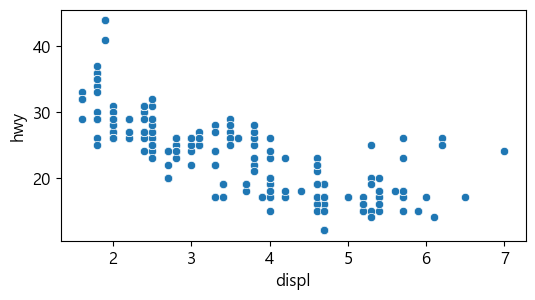

In [75]:
# 변수가 2개이면 산점도 표현 가능
sns.scatterplot(data=df, x='displ', y='hwy');
# 배기량이 증가할 수록 고속연비는 연비는 감소한다.

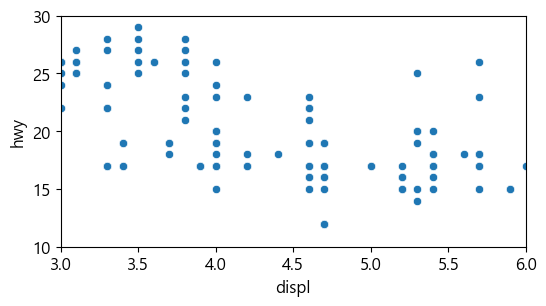

In [76]:
#축의 크기를 결정
sns.scatterplot(data=df, x='displ', y='hwy').set(xlim=(3, 6), ylim=(10, 30));

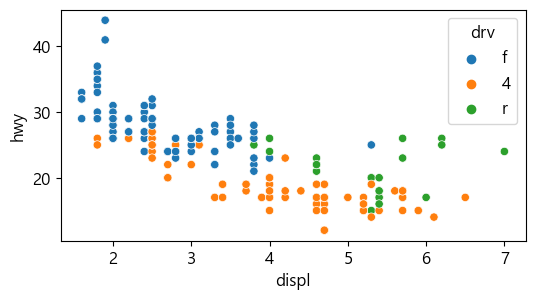

In [77]:
# 구동 방식별 구분
sns.scatterplot(data=df, x='displ', y='hwy', hue='drv'); # 전륜(f) 구동이 가장 연비가 좋음.

In [ ]:
# Seaborn은 matplotlib의 설정을 내부적으로 사용
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})            # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [8, 6]})       # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'font.size' : '15'})              # 글자 크기, 기본값 10
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) # 폰트, 기본값 sans-serif

# Dictionary 기법
# plt.rcParams.update({'figure.dpi'     : '100',  
#                      'figure.figsize' : [8, 6],
#                      'font.size'      : '15',
#                      'font.family'    : 'Malgun Gothic'})

In [80]:
# 구동 방식별 고속도로 연비 평균
df_drv = df.groupby('drv').agg(hwy_mean=('hwy', 'mean'))
df_drv

,hwy_mean
drv,
4,19.174757
f,28.160377
r,21.000000


In [82]:
# groupby 함수에 등장하는 컬럼은 일반 컬럼으로 출력됨
df_drv = df.groupby('drv', as_index=False).agg(hwy_mean=('hwy', 'mean'))
df_drv

,drv,hwy_mean
0,4,19.174757
1,f,28.160377
2,r,21.000000


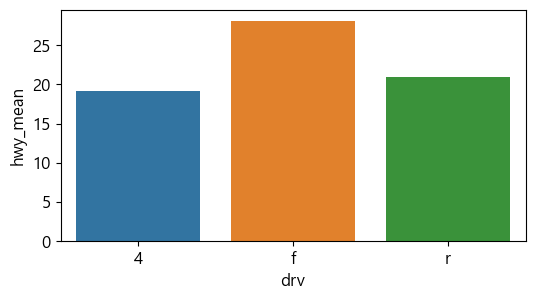

In [84]:
sns.barplot(data=df_drv, x='drv', y='hwy_mean');

In [85]:
# 연비가 가장 좋은 자동차 순,내림 차순
df_drv = df_drv.sort_values('hwy_mean', ascending=False)
df_drv

,drv,hwy_mean
1,f,28.160377
2,r,21.000000
0,4,19.174757


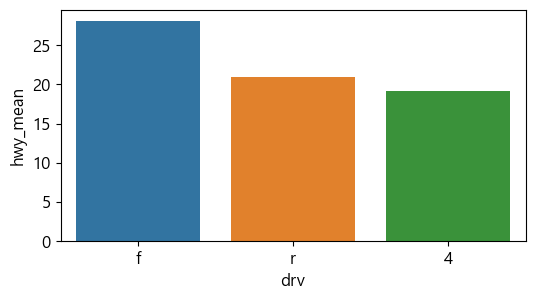

In [87]:
sns.barplot(data=df_drv, x='drv', y='hwy_mean');